## TASK 1:
Load the CSV into a DataFrame named fx. Parse Date as datetime and set it as the index. Confirm the index is sorted in ascending order and that all rate columns are numeric. Print the first five rows and the last five rows to verify the time span.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data_safe_copy.csv", parse_dates=["Date"])
df = df.set_index("Date")
df = df.sort_index()
print("Index type:", type(df.index))
print("Data types:")
print(df.dtypes)

df = df.apply(pd.to_numeric, errors="raise")

print("First 5 rows:")
display(df.head())

print("Last 5 rows:")
display(df.tail())

print("Date range:", df.index.min(), "to", df.index.max())

Matplotlib is building the font cache; this may take a moment.


Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Data types:
EURUSD    float64
GBPUSD    float64
PLNUSD    float64
USDPLN    float64
USDJPY    float64
AUDUSD    float64
NZDUSD    float64
USDCAD    float64
USDCHF    float64
EURPLN    float64
GBPPLN    float64
dtype: object
First 5 rows:


,EURUSD,GBPUSD,PLNUSD,USDPLN,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,EURPLN,GBPPLN
Date,,,,,,,,,,,
2025-01-02,1.02661,1.23826,0.240270,4.16199,157.4610,0.62033,0.55966,1.44067,0.91210,4.27274,5.15363
2025-01-03,1.03062,1.24267,0.241453,4.14160,157.3420,0.62176,0.56089,1.44467,0.90891,4.26841,5.14664
2025-01-06,1.03900,1.25188,0.244290,4.09350,157.6200,0.62427,0.56402,1.43330,0.90478,4.25315,5.12457
2025-01-07,1.03426,1.24771,0.242804,4.11855,158.0405,0.62326,0.56331,1.43683,0.90937,4.25965,5.13875
2025-01-08,1.03185,1.23638,0.241377,4.14290,158.3085,0.62132,0.56058,1.43758,0.91101,4.27485,5.12220


Last 5 rows:


,EURUSD,GBPUSD,PLNUSD,USDPLN,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,EURPLN,GBPPLN
Date,,,,,,,,,,,
2026-01-26,1.18777,1.36768,0.282362,3.54155,154.1550,0.69100,0.59697,1.37115,0.77720,4.20655,4.84370
2026-01-27,1.20426,1.38461,0.286789,3.48689,152.3020,0.70092,0.60433,1.35758,0.76114,4.19912,4.82798
2026-01-28,1.19562,1.38024,0.284316,3.51721,153.4235,0.70384,0.60594,1.35621,0.76859,4.20524,4.85459
2026-01-29,1.19695,1.38095,0.284600,3.51370,153.0050,0.70497,0.60751,1.34872,0.76476,4.20572,4.85224
2026-01-30,1.18534,1.36839,0.281465,3.55284,154.7785,0.69637,0.60212,1.36162,0.77302,4.21132,4.86167


Date range: 2025-01-02 00:00:00 to 2026-01-30 00:00:00


## TASK 2
Select two currency pairs, one that ends with USD and one that begins with USD. Create a line plot for each pair over time. Add clear titles and labels. Then create a third plot that shows both series together on the same axes so you can compare their movement directionally.

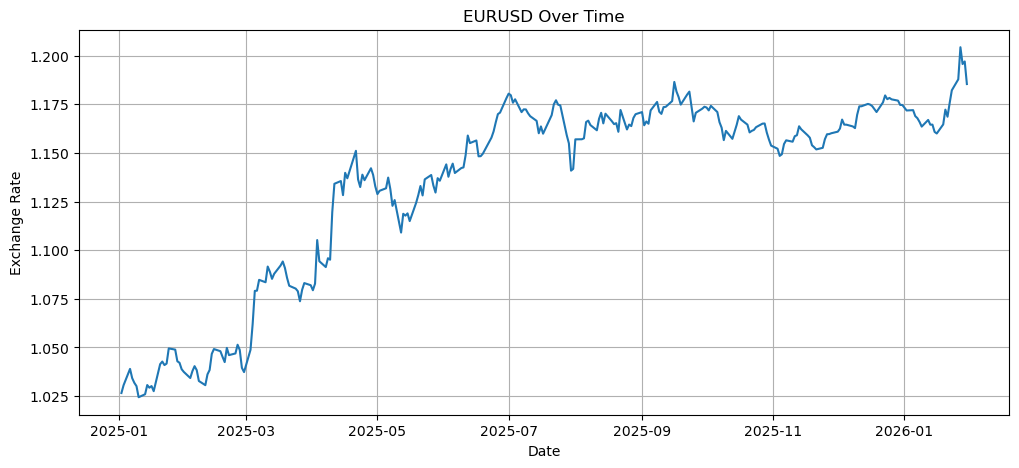

In [2]:
pair_ends_usd = "EURUSD"
pair_begins_usd = "USDJPY"

plt.figure(figsize=(12,5))
plt.plot(df.index, df[pair_ends_usd])
plt.title(f"{pair_ends_usd} Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.show()

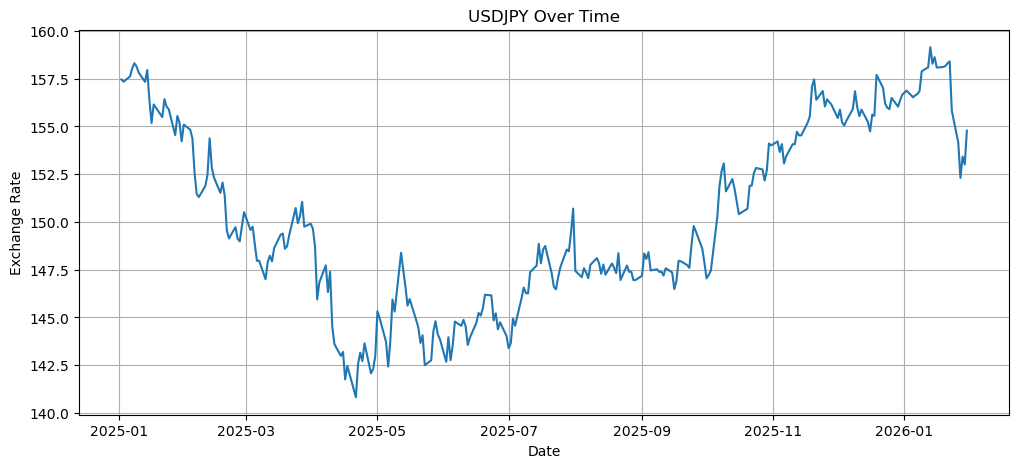

In [3]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df[pair_begins_usd])
plt.title(f"{pair_begins_usd} Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.show()

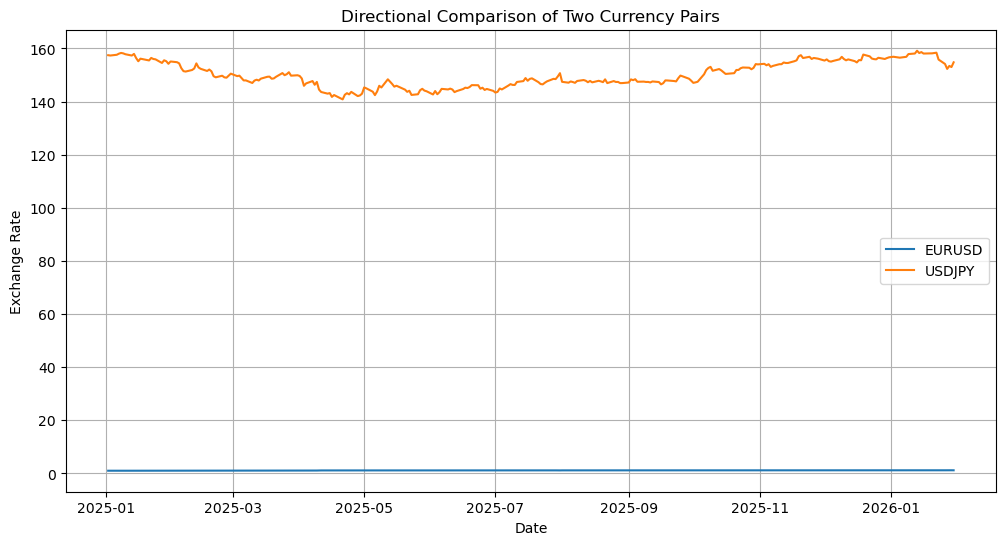

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df[pair_ends_usd], label=pair_ends_usd)
plt.plot(df.index, df[pair_begins_usd], label=pair_begins_usd)
plt.title("Directional Comparison of Two Currency Pairs")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.grid(True)
plt.show()

## TASK 3
Compute a 7‑day rolling mean and a 7‑day rolling standard deviation for the two currency pairs you selected. Store the rolling series with clear names. Print the first ten rows of the rolling results and confirm that missing values appear only where the window is incomplete.

In [5]:
window_size = 7

df[f"{pair_ends_usd}_roll_mean"] = df[pair_ends_usd].rolling(window=window_size).mean()
df[f"{pair_ends_usd}_roll_std"] = df[pair_ends_usd].rolling(window=window_size).std()

df[f"{pair_begins_usd}_roll_mean"] = df[pair_begins_usd].rolling(window=window_size).mean()
df[f"{pair_begins_usd}_roll_std"] = df[pair_begins_usd].rolling(window=window_size).std()

In [6]:
rolling_cols = [
    f"{pair_ends_usd}_roll_mean",
    f"{pair_ends_usd}_roll_std",
    f"{pair_begins_usd}_roll_mean",
    f"{pair_begins_usd}_roll_std"
]

display(df[rolling_cols].head(10))

,EURUSD_roll_mean,EURUSD_roll_std,USDJPY_roll_mean,USDJPY_roll_std
Date,,,,
2025-01-02,NaN,NaN,NaN,NaN
2025-01-03,NaN,NaN,NaN,NaN
2025-01-06,NaN,NaN,NaN,NaN
2025-01-07,NaN,NaN,NaN,NaN
2025-01-08,NaN,NaN,NaN,NaN
2025-01-09,NaN,NaN,NaN,NaN
2025-01-10,1.030991,0.004803,157.820571,0.363367
2025-01-13,1.030900,0.004905,157.802286,0.386934
2025-01-14,1.030911,0.004904,157.889214,0.330534


In [7]:
print("NaNs in first 6 rows (expected):")
print(df[rolling_cols].head(window_size - 1).isna().sum())

print("\nNaNs after window should be minimal:")
print(df[rolling_cols].iloc[window_size:].isna().sum())

NaNs in first 6 rows (expected):
EURUSD_roll_mean    6
EURUSD_roll_std     6
USDJPY_roll_mean    6
USDJPY_roll_std     6
dtype: int64

NaNs after window should be minimal:
EURUSD_roll_mean    0
EURUSD_roll_std     0
USDJPY_roll_mean    0
USDJPY_roll_std     0
dtype: int64


## TASK 4
Build a one‑step‑ahead baseline forecast for one selected currency pair by shifting the series by one day. Create a new column baseline_pred and compute the absolute error between the actual value and the baseline prediction. Then compute the mean absolute error and print it.

Add a validation check that confirms the number of non‑missing predictions equals the number of rows minus one.

In [9]:
model_pair = pair_ends_usd

df["baseline_pred"] = df[model_pair].shift(1)

df["abs_error"] = (df[model_pair] - df["baseline_pred"]).abs()

# Compute MAE
mae = df["abs_error"].mean()

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.004069426523297489


In [10]:
num_predictions = df["baseline_pred"].notna().sum()
expected_predictions = len(df) - 1

print("Non-missing predictions:", num_predictions)
print("Expected predictions:", expected_predictions)

assert num_predictions == expected_predictions
print("Validation passed ✔")

Non-missing predictions: 279
Expected predictions: 279
Validation passed ✔


## TASK 5
Write a small report dictionary that includes the chosen currency pairs, the rolling window size, the mean absolute error from the baseline model, and the date range of the dataset. Print the report and include one explicit check, such as confirming that the rolling window size you used matches the value in the report.

In [12]:
report = {
    "currency_pairs": [pair_ends_usd, pair_begins_usd],
    "rolling_window_size": window_size,
    "baseline_mae": float(mae),
    "date_range": (str(df.index.min()), str(df.index.max()))
}

print(report)
print("Rolling window size check passed ✔")

{'currency_pairs': ['EURUSD', 'USDJPY'], 'rolling_window_size': 7, 'baseline_mae': 0.004069426523297489, 'date_range': ('2025-01-02 00:00:00', '2026-01-30 00:00:00')}
Rolling window size check passed ✔
